# Section I: Concepts

I'm [John Williamson](http://johnhw.com)

The purpose of this crash course is to give you enough vocabulary to be able to follow the rest of the summer school. There isn't time to cover the details of the methods I'll talk about, the historical orgins and background or much about what techinques and models you might prefer and why. 

Instead, I aim to cover just enough that you can understand the material that follows.



## What is machine learning?

### Machine learning can be summarised as making *predictions* from *data*
This is slightly distinct from statistics, which is traditionally concerned with making inferences from data -- e.g. determining if an effect is present in a scientific study. Instead, machine learning tries to estimate unknown variables given some data which might predict them. 

### Machine learning in HCI
#### Example: gesture recognition
#### Example: language modelling
#### Example: touch prediction
#### Example: sensor fusion

### Some mathematical notation



In [271]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn.preprocessing
import ipy_table
import sklearn.svm, sklearn.cross_validation, sklearn.grid_search, sklearn.metrics
import pandas as pd
# force plots to appear inline on this page
%matplotlib inline

## Supervised versus unsupervised learning

Supervised learning involves learning a relationship between attribute variables and target variables; in other words learning a function which maps input measurements to target values. This can be in the context of making discrete decisions (is this image a car or not?) or learning continuous relationships (

#### Classification
#### Regression
#### Clustering
#### Dimensional reduction
#### Manifolds and latent variables
#### Learning-to-rank


#### Generative models versus black box models
##### Tank recognition

## Features, labels, data formats

### Types of data
#### Continuous
#### Ordinal
#### Categorical
### Feature vectors
#### Vector length
#### Selecting or generating features
#### Dealing with time series, text, images, sounds
### Labels
#### One-hot encoding
#### Hyperparameters
##### Learning rate
##### Smoothness
##### Momentum
##### Grid search
##### Using grid seaches effectively

### Learning
#### Batches, online learning, mini-batches
#### Loss functions
#### Gradient descent 
##### Stochastic gradient descent
#### Unbalanced data
#### Solutions for unbalanced data



## Evaluating machine learning



### Classifiers
#### Accuracy
#### Why is accuracy not enough?
#### FAR, FRR, F1-score
#### Receiver-operator curves
#### EER, AUC
#### Confusion matrices

### Unsupervised learning
#### Clustering metrics
#### 


In [183]:
%cd datasets/uci
%ls

c:\work\summerschool2015\datasets\uci
 Volume in drive C is OS
 Volume Serial Number is F2AC-1EA1

 Directory of c:\work\summerschool2015\datasets\uci

12/06/2015  13:50    <DIR>          .
12/06/2015  13:50    <DIR>          ..
12/06/2015  13:36         1,470,557 clean2.data.Z
12/06/2015  13:36             7,039 clean2.info
12/06/2015  13:30             4,551 iris.data
12/06/2015  13:39    <DIR>          regression
12/06/2015  13:37             9,300 seeds_dataset.txt
12/06/2015  13:48            87,776 sonar.all-data
12/06/2015  13:48             5,872 sonar.names
12/06/2015  13:43            47,954 Tennis-Major-Tournaments-Match-Statistics.zip
12/06/2015  13:50           118,593 wilt.zip
12/06/2015  13:30            10,782 wine.data
12/06/2015  13:30             3,036 wine.names
              10 File(s)      1,765,460 bytes
               3 Dir(s)  384,154,849,280 bytes free


In [260]:
# load the "Sonar" data set [https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)]
# This is a set of 60 sonar measurements, from bouncing sonar waves off either rocks ("R") or mines ("M")
# The problem is to tell the mines apart from the rocks
sonar_data = pd.read_csv("sonar.all-data")

# separate features
sonar_features = np.array(sonar_data)[:,0:60].astype(np.float64)

# we use label_binarize to convert "M" and "R" labels into {0,1}
# the ravel() just flattens the resulting 1D matrix into a vector
sonar_labels = sklearn.preprocessing.label_binarize(np.array(sonar_data)[:,60], classes=['M', 'R']).ravel()

# split into a train and test section, holding out 20% (0.2) of the data for testing
sonar_train_features, sonar_test_features, sonar_train_labels, sonar_test_labels = sklearn.cross_validation.train_test_split(
    sonar_features, sonar_labels, test_size=0.3, random_state=0)

# fit an SVM
svm = sklearn.svm.SVC(C=15, gamma=0.12)
svm.fit(sonar_train_features, sonar_train_labels)
print "Score: %f" % svm.score(sonar_test_features, sonar_test_labels)



Score: 0.825397


In [272]:
# we can print the confusion matrix
sonar_predicted_labels = svm.predict(sonar_test_features)
confusion_matrix =  sklearn.metrics.confusion_matrix(sonar_test_labels, sonar_predicted_labels)

# ipy_table.make_table just pretty prints the resulting matrix
ipy_table.make_table(confusion_matrix)

32,3
8,20


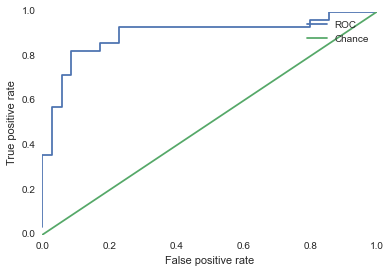

In [262]:
# we can plot the receiver-operator curve: the graph of false positive rate against true positive rate
scores = svm.decision_function(sonar_test_features)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(sonar_test_labels, scores)
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(["ROC", "Chance"])

In [266]:
print "AUC=%f" % sklearn.metrics.roc_auc_score(sonar_test_labels, scores)
print "Accuracy=%f" % sklearn.metrics.accuracy_score(sonar_test_labels, sonar_predicted_labels)
# F1 =  2 * (precision * recall) / (precision + recall)
print "F1 score=%f" % sklearn.metrics.f1_score(sonar_test_labels, sonar_predicted_labels)

AUC=0.894898
Accuracy=0.825397
F1 score=0.784314


In [269]:
print sklearn.metrics.classification_report(sonar_test_labels, sonar_predicted_labels)

             precision    recall  f1-score   support

          0       0.80      0.91      0.85        35
          1       0.87      0.71      0.78        28

avg / total       0.83      0.83      0.82        63



In [243]:

# let's search for the best parameters of C and gamma
# we create a grid of parameter values, log-spaced across a wide range
C_vals = np.logspace(-2,8,10)
gamma_vals = np.logspace(-4,3,10)

# 10x10 values of C and gamma; 10 fold cross validation for each
grid_cv = sklearn.grid_search.GridSearchCV(svm, {'C':C_vals, 'gamma':gamma_vals}, cv=10)
grid_cv.fit(sonar_train_features, sonar_train_labels)


GridSearchCV(cv=10,
       estimator=SVC(C=21.5, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.13, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.29155e-01,   1.66810e+00,   2.15443e+01,
         2.78256e+02,   3.59381e+03,   4.64159e+04,   5.99484e+05,
         7.74264e+06,   1.00000e+08]), 'gamma': array([  1.00000e-04,   5.99484e-04,   3.59381e-03,   2.15443e-02,
         1.29155e-01,   7.74264e-01,   4.64159e+00,   2.78256e+01,
         1.66810e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [244]:
# print the optimal best results
print grid_cv.best_params_
print grid_cv.best_score_


{'C': 21.544346900318846, 'gamma': 0.12915496650148839}
0.888888888889


#### Polynomial overfitting
A simple example of overfitting can be seen when fitting a polynomial $y=a_0x^0 + a_1x^1 + \dots + a_qx^q$ to $n$ points. When $n=q$, the curve goes through all the points, but makes wildly inappropriate interpolations between them.

The example below shows this effect:

In [ ]:
# create some random points
n_points = 6
x = np.random.uniform(-1,1,(n_points,))
y = np.random.uniform(-1,1,(n_points,))

In [ ]:
# plot the points
plt.scatter(x,y);

We define a short function to fit and plot a polynomial fit . NumPy has a built in function `polyfit` which does least-squares fitting).

In [ ]:
def plot_poly_fit(x,y,order):    
    plt.figure()
    plt.scatter(x,y)
    # fit a polynomial
    coeffs = np.polyfit(x,y,order)
    # evaluate it across the domain
    xs = np.linspace(np.min(x),np.max(x),100)
    ys = np.polyval(coeffs, xs)
    plt.plot(xs,ys)
    

In [ ]:
plot_poly_fit(x,y,order=1) # order=1 means a linear fit

Try running the above code with increasing values for the order

#### Kernel density estimation example
We can see the same effect if we try to learn the distribution of data using **kernel density estimation** (KDE). KDE is effectively a smoothed histogram, which is created by "placing" smooth distributions on each observed data point and summing them (i.e. convolving them with some window function). This can be used to estimate an underlying smooth distribution from point samples.

The key parameter in KDE is the **kernel width** $\sigma$, which determines how wide each distribution will be and thus how smooth the overall distribution will be.

In [ ]:
# generate some random numbers -- the use of the  beta distribution isn't important, it just gives an interesting shape
x = np.random.beta(0.5, 2, 40);
# plot the data points
plt.figure()
# scatter plot showing the actual positions
plt.scatter(x,np.ones_like(x))
plt.figure()
# histogram of the data points
plt.hist(x, normed=True);

In [ ]:
import scipy.stats as stats 

# plot the kernel density estimate (Gaussian window) with the given bandwidth
def plot_kde(x, width):
    kde = stats.kde.gaussian_kde(x, bw_method=width)
    # evaluate kde estimate over range of x
    xs = np.linspace(np.min(x), np.max(x), 100) 
    plt.figure()
    plt.plot(xs, kde(xs))
    plt.scatter(x, np.ones_like(x))


In [ ]:
plot_kde(x, 2) # too smooth
plot_kde(x, 1) # a bit too smooth
plot_kde(x, 0.5) # good
plot_kde(x, 0.1) # too rough
plot_kde(x, 0.01) # just learning the data points



As the function approximates the data better, the generalisation performance drops. If we split the data randomly into two portions $X_1$ and $X_2$, and learn the KDE using only $X_1$ (training set) and then compute how likely $X_2$ (test set) is given that learned distribution, we can see this loss of generalisation performance.


In [ ]:
def split_data(x):
    # our data here is random and uncorrelated, so we can just split the array into two
    l = len(x)//2
    return x[:l], x[l:]

def learn_kde(x, width):
    return stats.kde.gaussian_kde(x,width)

def evaluate_kde(x, kde):
    # we can compute the log-likelihood by summing the log pdf evaluated at x
    return np.sum(kde.logpdf(x))


In [ ]:
def test_kde(x, width):
    # split the data into two parts, train on one, and then test it on both of the splits
    x1,x2 = split_data(x)
    kde = learn_kde(x1, width)
    # return the train log-likelihood and test log-likelihood    
    return evaluate_kde(x1, kde), evaluate_kde(x2, kde)


In [ ]:
def plot_kde_lik(x):
    # plot test and train log-likelihood as a function of 1/sigma
    widths = np.linspace(0.05, 20, 100)
    trains = []
    tests = []
    # test a bunch of widths
    for width in widths:
        train, test = test_kde(x,1.0/width)
        trains.append(train)
        tests.append(test)
        
    # plot and label
    plt.plot(widths, trains)
    plt.plot(widths, tests)
    plt.xlabel("$\sigma^{-1}$")
    plt.ylabel("Log-likelihood")
    plt.legend(["Training", "Test"])
    

We can plot the log-likelihood as a function of $\sigma^{-1}$ (the reciprocal simply makes it easier to see what is going on in the graph).

In [ ]:
plot_kde_lik(x)

### Training error can always be reduced -- but it makes things worse
We can see that test and training become better as $\sigma^{-1}$ approaches 2-4 (the exact value will depend on what random numbers we originally drew), then rapidly decreases; but the training log-likelihood **always** increases as we approximate the original data better and better.

## Data hygiene
This is why **data hygiene** is absolutely critical. If you let any part of the data you use to evaluate performance affect the train process your results are *meaningless*. 

#### Randomised selection
One approach to splitting up data is to randomly assign some elements to the training set and some to the test set (e.g. in an image classification task, 70% of the images are assigned to the training class and 30% to the test class). 

This seems like an unbiased way of separating the data, and it is for problems which are effectively uncorrelated. But imagine we have a time series $x_0, x_1, \dots, x_n$ and we build our input features $X_0, X_1, \dots$ by taking overlapping windows of the series. If we randomly choose elements of $X$, many of the elements in the test and training set may be almost identical ( because they appeared next to each other in the time series). This leads to wildly optimistic test results


#### Block selection
A much better approach here is to split the data into a large chunks. Say the data was a series of field recordings of birds taken on 10 different days; the first 6 days might be assigned as training and the last 4 as test. 

This is much more likely to be a reliable estimator of future performance, because the key idea is to *predict future behaviour* -- to learn what we have not seen. Choosing the split of training and test requires thought and domain knowledge and it is critical to make sure that the evaluation results are meaningful.



### Cross validation
Sometimes the data is too precious to split into training and test sets; there simply isn't enough of it. 

One approach to getting reliable results without overfitting is to use *cross validation*. This simply involves splitting the data into a test and training set repeatedly and averaging the results. 

#### k-fold cross validation
*k-fold* cross validation splits the data into $k$ blocks (again the block selection strategy needs to be chosen carefully to avoid overfitting) and then trains on $k-1$ of the blocks and test on the remaining one, for each of the $k$ test blocks.
#### Leave-one-out cross validation (LOOCV)
LOOCV takes this to an extreme, and splits the data into $k=n$ blocks (for $n$ data points) and trains on all but one data point and tests on the one that was left out. This is a reliable estimator of performance but can be very computationally expensive, and the benefits over $k$-fold cross validation are not always great.

 



In [ ]:
# k-fold cross validation with the KDE example

def k_split(x, k):
    # split the data into even chunks
    l = len(x)//k
    return [x[i*l:(i+1)*l] for i in range(k)]

    

In [ ]:
def test_kde_k_fold(x, width, k):
    # split the data into two parts, train on one, and then test it on both of the splits
    liks = []
    folds = k_split(x,k)
    for kn in range(k):
        # concatenate all folds *but* kn
        x1 = np.concatenate([folds[i] for i in range(k) if i!=kn])            
        # test set is the one we left out
        x2 = folds[kn]
        # fit the KDE
        kde = learn_kde(x1, width)
        # return the log-likelihood for this fold
        lik = evaluate_kde(x2, kde)
        liks.append(lik)
    return liks

In [ ]:
# now we can plot the performance with one std. dev. bounds

def plot_kde_lik_k_fold(x, k):
    # plot test and train log-likelihood as a function of 1/sigma
    widths = np.linspace(0.05, 20, 100)
    means = []
    stds = []
    # test a bunch of widths
    for width in widths:
        ks = test_kde_k_fold(x,1.0/width,k)
        means.append(np.mean(ks))
        stds.append(np.std(ks))
                
    # plot and label    
    means = np.array(means) # convert lists no numpy arrays so we can do arithmetic on them
    stds = np.array(stds)
    
    plt.fill_between(widths, means-stds, means+stds, alpha=0.1)
    plt.plot(widths, means)
    plt.xlabel("$\sigma^{-1}$")
    plt.ylabel("Log-likelihood")
    

In [ ]:
plot_kde_lik_k_fold(x, 5)

### Validation sets
Often your learning algorithms might have hyperparameters you need to estimate (e.g. learning rate). 

You absolutely **cannot** use the test set to evaluate the performance with various parameter settings and then choose the best one. This will overfit, because the test set is influencing the training performance. Train and test must be **completely** separated; no information may flow from the test data to the training process

Instead, you can create a **validation** set from the training set, and use that to tweak the hyperparameters. One common and sensible approach is to first separate off a single, fixed test set, and then use cross-validation to create multiple train and validation sets. 

#### Nested cross-validation
*Nested cross-validation* applies cross validation to both the validation and test sets, first fixing a fold split for the test set, then optimising the hyperparameters using cross-validation on the remaining data, then moving onto the next fold split for the test set, and so on.



### Baselines
Let's return to our classification example. What is good performance? Or more particularly, what is bad performance -- what's the baseline? A very simple test of whether the classifier is learning **anything** useful is to simply randomly permute the targets so they no longer correspond to the inputs. 

This estimates the chance performance of the classification process. It might be that you have a binary classification problem with exactly balanced datasets, so the baseline is 50%; but often the data is unbalanced and there are multiple classes. Permuting the targets is a very quick way to test the random performance.


## Meta-algorithms
### Why meta algorithms?
### Voting hybrid models
#### Weighted models
### Bagging
### Boosting